## Final Project

In [15]:
#don't run this 
pip uninstall -y numpy

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Note: you may need to restart the kernel to use updated packages.


In [16]:
#don't run this
pip cache purge

Files removed: 14
Note: you may need to restart the kernel to use updated packages.


In [17]:
#don't run this
pip install --upgrade matplotlib scipy seaborn pandas pandas-datareader yfinance

     |████████████████████████████████| 21.2 MB 18.9 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [18]:
#import the library and tools
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas_datareader import DataReader
from datetime import datetime
import scipy.stats as ss
import yfinance as yf

start_date = datetime(2020,1,31)
end_date = datetime(2024,8,31)

In [19]:
#download the datasets
stock = yf.download('TSLA',start= start_date, end = end_date)

[*********************100%***********************]  1 of 1 completed


## Stock Analysis and Competitor Summary

In [20]:
#Stock Analysis and Competitor Summary(Assignment1)
stock.info()
print(stock.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1154 entries, 2020-01-31 to 2024-08-30
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, TSLA)  1154 non-null   float64
 1   (Close, TSLA)      1154 non-null   float64
 2   (High, TSLA)       1154 non-null   float64
 3   (Low, TSLA)        1154 non-null   float64
 4   (Open, TSLA)       1154 non-null   float64
 5   (Volume, TSLA)     1154 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 63.1 KB
Price       Adj Close      Close       High        Low       Open     Volume
Ticker           TSLA       TSLA       TSLA       TSLA       TSLA       TSLA
Date                                                                        
2020-01-31  43.371334  43.371334  43.533333  42.167999  42.666668  235789500
2020-02-03  52.000000  52.000000  52.409332  44.901333  44.912666  705975000
2020-02-04  59.137333  59.137333  64.599335  55.591999  

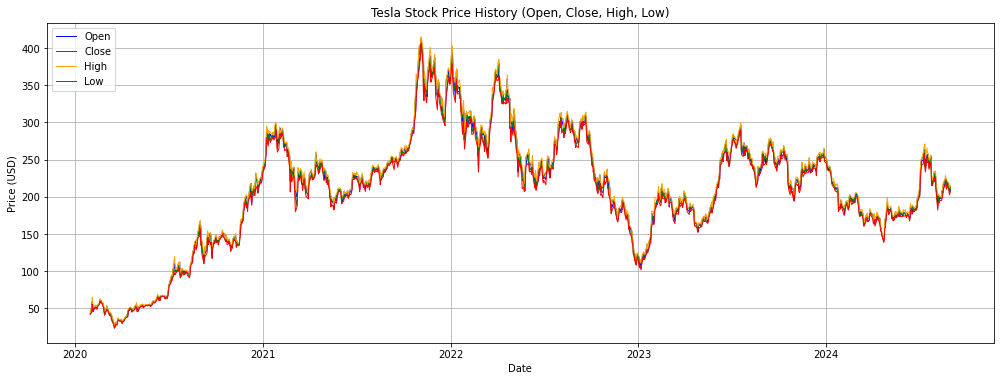

In [21]:
#Plot the stock price history(Open, Close, High, Low)
# Ensure index is datetime for Matplotlib compatibility
stock.index = pd.to_datetime(stock.index)

plt.figure(figsize=(14, 10))

# Plot Open, Close, High, Low
plt.subplot(2, 1, 1)
plt.plot(stock.index, stock['Open'], label='Open', color='blue', linewidth=1)
plt.plot(stock.index, stock['Close'], label='Close', color='green', linewidth=1)
plt.plot(stock.index, stock['High'], label='High', color='orange', linewidth=1)
plt.plot(stock.index, stock['Low'], label='Low', color='red', linewidth=1)
plt.title('Tesla Stock Price History (Open, Close, High, Low)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


## Find 3 competitors and visualize their stock price history in the same time period - BMW, NIO, and BYD

[*********************100%***********************]  3 of 3 completed


Price       Adj Close                       Close                        High  \
Ticker         BMW.DE        BYD   NIO     BMW.DE        BYD   NIO     BMW.DE   
Date                                                                            
2020-01-31  46.924061  28.973951  3.78  64.339996  29.850000  3.78  65.680000   
2020-02-03  46.953239  29.527227  4.06  64.379997  30.420000  4.06  64.750000   
2020-02-04  47.368942  30.391104  4.51  64.949997  31.309999  4.51  65.209999   
2020-02-05  48.295174  31.119091  4.39  66.220001  32.060001  4.39  66.570000   
2020-02-06  48.375401  31.827673  4.08  66.330002  32.790001  4.08  67.279999   

Price                              Low                        Open             \
Ticker            BYD   NIO     BMW.DE        BYD   NIO     BMW.DE        BYD   
Date                                                                            
2020-01-31  31.129999  4.04  64.209999  29.770000  3.67  65.599998  30.820000   
2020-02-03  30.670000  4.11

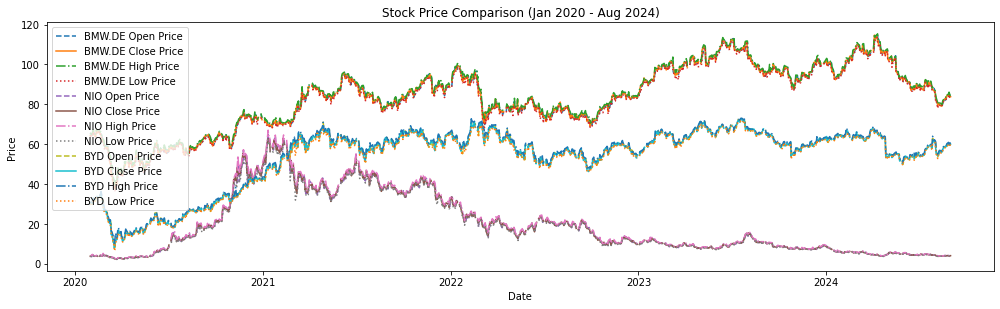

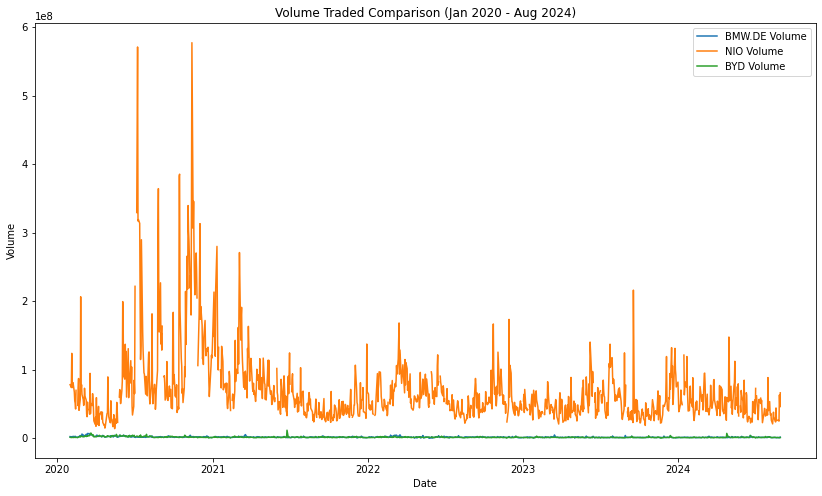

In [22]:
tickers = ['BMW.DE', 'NIO', 'BYD', ]

#download the stock data from yfinance:
data = yf.download(tickers, start = start_date, end = end_date )
print(data.head())

# Visualize Open, Close, High, Low prices for all tickers
plt.figure(figsize=(14, 8))
plt.subplot(2, 1, 1)# Loop through each ticker and plot Open, Close, High, and Low prices
for ticker in tickers:
    plt.plot(data['Open'][ticker], label=f'{ticker} Open Price', linestyle='--') 
    plt.plot(data['Close'][ticker], label=f'{ticker} Close Price')  
    plt.plot(data['High'][ticker], label=f'{ticker} High Price', linestyle='-.')  
    plt.plot(data['Low'][ticker], label=f'{ticker} Low Price', linestyle=':')  
    
plt.title('Stock Price Comparison (Jan 2020 - Aug 2024)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend() 
plt.tight_layout()
plt.show()


# Visualize Volume traded for all tickers
plt.figure(figsize=(14, 8))


# Loop through each ticker and plot trading volume
for ticker in tickers:
    plt.plot(data['Volume'][ticker], label=f'{ticker} Volume')

# Set the title and axis labels for the volume plot
plt.title('Volume Traded Comparison (Jan 2020 - Aug 2024)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend() 
plt.show()

## Extracting the adjusted close of Tesla, calculating mean, variance, skewness and kurtosis, and kernel density estimation¶

mean: 210.14264989684318
variance: Ticker
TSLA    6012.516198
dtype: float64
Skewness: [-0.32115955]
Kurtosis: [0.0443776]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/_core/fromnumeric.py:4006: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


Text(0.5, 0, 'Adjusted Close Price (USD)')

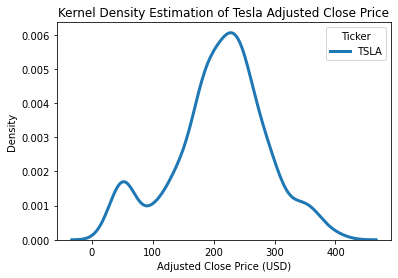

In [23]:
# extract the adjusted close column from the datasets
adjusted_close = stock['Adj Close'].dropna()

# calculate the mean, variance, skewness, and kurtosis of the adjusted close column
mean_adj_close = np.mean(adjusted_close)
variance_adj_close = np.var(adjusted_close)
skewness_adj_close = ss.skew(adjusted_close)
kurtosis_adj_close = ss.kurtosis(adjusted_close)

#Display the values:
print("mean:", mean_adj_close)
print("variance:",variance_adj_close)
print("Skewness:", skewness_adj_close)
print("Kurtosis:", kurtosis_adj_close)
sns.kdeplot(data=adjusted_close,linewidth=3)
plt.title('Kernel Density Estimation of Tesla Adjusted Close Price')
plt.xlabel('Adjusted Close Price (USD)')

In [ ]:
#Feature Database Creation


In [ ]:
#Feature Selection


In [ ]:
#Model Training and Performance Comparison


In [ ]:
#Benchmark Study(Assignment2 Garch & Kalman)


## Garch Model

## Kalman Filter

In [ ]:
# Trading Rules and Signal Generation
